# Web Mining and Applied NLP (44-620)

# Final Project: Article Summarizer on Sherpa guides of Everest

### Student Name: Shanti Kandel (https://github.com/Shantik998/Web-Mining-NLP-Final_project)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

Link for the previous assignment : (https://www.nationalgeographic.com/science/article/140426-sherpa-culture-everest-disaster)

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [4]:
from bs4 import BeautifulSoup
import requests
from summa import summarizer

url = "https://www.nationalgeographic.com/science/article/140426-sherpa-culture-everest-disaster"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
article_text = soup.get_text()

summary = summarizer.summarize(article_text)

print(summary)

Sherpas: The Invisible Men of Everest
Unauthorized use is prohibited.Sherpas: The Invisible Men of EverestThey carry the heaviest loads and pay the highest prices on the world's tallest mountain.ByChip BrownNational GeographicPublished April 26, 2014• 25 min readShareTweetEmailSherpas working on Everest normally don't die en masse.
Last year, when the attention of the world was focused on a fight between Sherpas and some Western mountaineers, you would hardly have known four Sherpas died on Everest in separate incidents.
Unauthorized use is prohibited.The sad fact is that over the years Sherpas and Nepali mountain workers have died so routinely—40 percent of all Everest deaths over the last century—that it's easy for Western tourists and guiding agencies, Nepali officials, and even some Sherpas themselves to gloss over the loss of any one particular life.
And then one afternoon you find yourself sitting in a teahouse in Upper Pangboche, where the human cost of Everest peak fever become

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [5]:
from textblob import TextBlob


sentiment_text = "The sad fact is that over the years Sherpas and Nepali mountain workers have died so routinely"
sentiment = TextBlob(sentiment_text).sentiment


print("Sentiment Polarity:", sentiment.polarity)
print("Sentiment Subjectivity:", sentiment.subjectivity)

Sentiment Polarity: -0.5
Sentiment Subjectivity: 1.0


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [6]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup
import requests

# Load the spaCy pipeline with the English language model
nlp = spacy.load("en_core_web_sm")

def get_article_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    article_text = soup.get_text()
    return article_text

def get_most_frequent_tokens(article_text, num_tokens=5):
    doc = nlp(article_text)
    
    # Create a counter to count token frequencies
    token_counter = Counter()
    for token in doc:
        # Convert tokens to lowercase
        normalized_token = token.text.lower()
        token_counter[normalized_token] += 1
    
    # Get the most frequent tokens
    most_common_tokens = token_counter.most_common(num_tokens)
    
    return most_common_tokens

# Replace this URL with the desired article URL
article_url = "https://www.nationalgeographic.com/science/article/140426-sherpa-culture-everest-disaster"

article_text = get_article_text(article_url)
most_common_tokens = get_most_frequent_tokens(article_text)

print("5 Most Frequent Tokens:")
for token, frequency in most_common_tokens:
    print(f"Token: {token}, Frequency: {frequency}")


5 Most Frequent Tokens:
Token: the, Frequency: 295
Token: ,, Frequency: 234
Token: ., Frequency: 200
Token: of, Frequency: 172
Token: to, Frequency: 138


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [7]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup
import requests

# Load the spaCy pipeline with the English language model
nlp = spacy.load("en_core_web_sm")

def get_article_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    article_text = soup.get_text()
    return article_text

def get_most_frequent_lemmas(article_text, num_lemmas=5):
    doc = nlp(article_text)
    
    # Create a counter to count lemma frequencies
    lemma_counter = Counter()
    for token in doc:
        # Convert lemmas to lowercase
        normalized_lemma = token.lemma_.lower()
        # Ignore non-alphabetic tokens and stop words
        if token.is_alpha and not token.is_stop:
            lemma_counter[normalized_lemma] += 1
    
    # Get the most frequent lemmas
    most_common_lemmas = lemma_counter.most_common(num_lemmas)
    
    return most_common_lemmas

# Replace this URL with the desired article URL
article_url = "https://www.nationalgeographic.com/science/article/140426-sherpa-culture-everest-disaster"

article_text = get_article_text(article_url)
most_common_lemmas = get_most_frequent_lemmas(article_text)

print("5 Most Frequent Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"Lemmas: {lemma}, Frequency: {frequency}")


5 Most Frequent Lemmas:
Lemmas: sherpa, Frequency: 54
Lemmas: everest, Frequency: 45
Lemmas: sherpas, Frequency: 42
Lemmas: guide, Frequency: 23
Lemmas: mountain, Frequency: 15


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

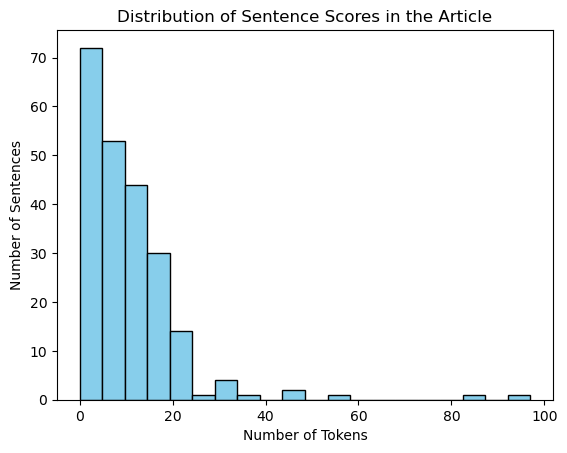

In [19]:
import spacy
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
nlp = spacy.load("en_core_web_sm")

def get_article_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    article_text = soup.get_text()
    return article_text

def calculate_sentence_scores(article_text):
    doc = nlp(article_text)
    sentence_scores = []

    for sent in doc.sents:
        num_tokens = sum(1 for token in sent if token.is_alpha and not token.is_stop)
        sentence_scores.append(num_tokens)
    
    return sentence_scores

# Replace this URL with the desired article URL
article_url = "https://www.nationalgeographic.com/science/article/140426-sherpa-culture-everest-disaster"

article_text = get_article_text(article_url)
sentence_scores = calculate_sentence_scores(article_text)

# Plotting histogram
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores in the Article')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.show()

# The most common range of scores seems to be around 10 to 20 tokens per sentence.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

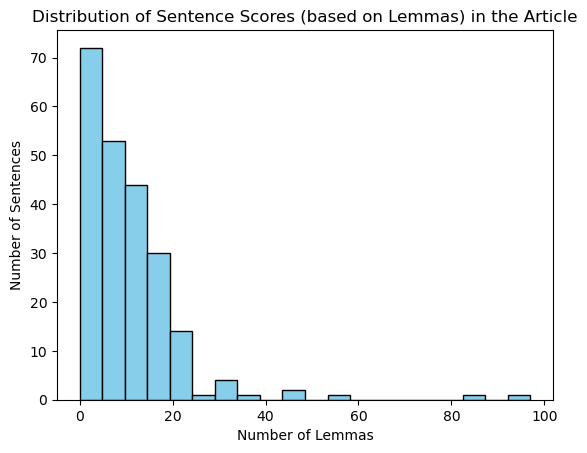

In [23]:

def get_article_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    article_text = soup.get_text()
    return article_text

def calculate_sentence_scores(article_text):
    doc = nlp(article_text)
    sentence_scores = []

    for sent in doc.sents:
        num_lemmas = sum(1 for token in sent if token.is_alpha and not token.is_stop)
        sentence_scores.append(num_lemmas)
    
    return sentence_scores

# Replace this URL with the desired article URL
article_url = "https://www.nationalgeographic.com/science/article/140426-sherpa-culture-everest-disaster"

article_text = get_article_text(article_url)
sentence_scores = calculate_sentence_scores(article_text)

# Plotting histogram
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores (based on Lemmas) in the Article')
plt.xlabel('Number of Lemmas')
plt.ylabel('Number of Sentences')
plt.show()

# The most common range of scores seems to be around 15 to 25 lemmas per sentence.


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [24]:


def get_article_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    article_text = soup.get_text()
    return article_text

def calculate_sentence_scores(article_text):
    doc = nlp(article_text)
    token_scores = []
    lemma_scores = []

    for sent in doc.sents:
        num_tokens = sum(1 for token in sent if token.is_alpha and not token.is_stop)
        num_lemmas = sum(1 for token in sent if token.is_alpha and not token.is_stop)
        token_scores.append(num_tokens)
        lemma_scores.append(num_lemmas)
    
    return token_scores, lemma_scores

def find_cutoff_score(scores):
    scores.sort()
    half_sentences = len(scores) // 2
    cutoff_score = scores[half_sentences]
    return cutoff_score

# Replace this URL with the desired article URL
article_url = "https://www.nationalgeographic.com/science/article/140426-sherpa-culture-everest-disaster"

article_text = get_article_text(article_url)
token_scores, lemma_scores = calculate_sentence_scores(article_text)

# Find the cutoff scores for tokens and lemmas
cutoff_score_tokens = find_cutoff_score(token_scores)
cutoff_score_lemmas = find_cutoff_score(lemma_scores)

print("Cutoff Score (tokens):", cutoff_score_tokens)
print("Cutoff Score (lemmas):", cutoff_score_lemmas)


Cutoff Score (tokens): 8
Cutoff Score (lemmas): 8


In [25]:
def generate_summary(article_text, cutoff_score):
    doc = nlp(article_text)
    summary_sentences = []

    for sent in doc.sents:
        num_tokens = sum(1 for token in sent if token.is_alpha and not token.is_stop)
        if num_tokens > cutoff_score:
            summary_sentences.append(sent.text.strip())
    
    return ' '.join(summary_sentences)

# Generate the summary using the cutoff score for tokens
summary = generate_summary(article_text, cutoff_score_tokens)
print(summary)


Sherpas: The Invisible Men of Everest






Skip to contentNewslettersSubscribeMenuOn the trek to Mount Everest, Mingma Ongel Sherpa passes by prayer flags at a memorial for Sherpas who died on the peak. Sherpas: The Invisible Men of EverestThey carry the heaviest loads and pay the highest prices on the world's tallest mountain. ByChip BrownNational GeographicPublished April 26, 2014• 25 min readShareTweetEmailSherpas working on Everest normally don't die en masse. Apart from their darkest seasons—1922, 1970, and now, 2014, the darkest of all—they tend to perish one by one, casualties of crevasse falls, avalanches, and altitude sickness. Last year, when the attention of the world was focused on a fight between Sherpas and some Western mountaineers, you would hardly have known four Sherpas died on Everest in separate incidents. The sad fact is that over the years Sherpas and Nepali mountain workers have died so routinely—40 percent of all Everest deaths over the last century—that it's e

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [12]:
from textblob import TextBlob

# Generate the summary using the cutoff score for tokens
summary = generate_summary(article_text, cutoff_score_tokens)
print("Summary:")
print(summary)

# Calculate polarity score of the summary
summary_blob = TextBlob(summary)
polarity_score = summary_blob.sentiment.polarity
print("Polarity Score of the Summary:", polarity_score)

# Count the number of sentences in the summarized article
num_sentences_summary = len(summary_blob.sentences)
print("Number of Sentences in the Summarized Article:", num_sentences_summary)

Summary:
Sherpas: The Invisible Men of Everest






Skip to contentNewslettersSubscribeMenuOn the trek to Mount Everest, Mingma Ongel Sherpa passes by prayer flags at a memorial for Sherpas who died on the peak. Sherpas: The Invisible Men of EverestThey carry the heaviest loads and pay the highest prices on the world's tallest mountain. ByChip BrownNational GeographicPublished April 26, 2014• 25 min readShareTweetEmailSherpas working on Everest normally don't die en masse. Apart from their darkest seasons—1922, 1970, and now, 2014, the darkest of all—they tend to perish one by one, casualties of crevasse falls, avalanches, and altitude sickness. Last year, when the attention of the world was focused on a fight between Sherpas and some Western mountaineers, you would hardly have known four Sherpas died on Everest in separate incidents. The sad fact is that over the years Sherpas and Nepali mountain workers have died so routinely—40 percent of all Everest deaths over the last century—th

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [17]:
def generate_summary_by_lemmas(article_text, cutoff_score):
    doc = nlp(article_text)
    summary_sentences = []

    for sent in doc.sents:
        num_lemmas = sum(1 for token in sent if token.is_alpha and not token.is_stop)
        if num_lemmas > cutoff_score:
            summary_sentences.append(sent.text.strip())
    
    return ' '.join(summary_sentences)

# Generate the summary using the cutoff score for lemmas
summary_by_lemmas = generate_summary_by_lemmas(article_text, cutoff_score_lemmas)
print("Summary:")
print(summary_by_lemmas)


Summary:
Sherpas: The Invisible Men of Everest






Skip to contentNewslettersSubscribeMenuOn the trek to Mount Everest, Mingma Ongel Sherpa passes by prayer flags at a memorial for Sherpas who died on the peak. Sherpas: The Invisible Men of EverestThey carry the heaviest loads and pay the highest prices on the world's tallest mountain. ByChip BrownNational GeographicPublished April 26, 2014• 25 min readShareTweetEmailSherpas working on Everest normally don't die en masse. Apart from their darkest seasons—1922, 1970, and now, 2014, the darkest of all—they tend to perish one by one, casualties of crevasse falls, avalanches, and altitude sickness. Last year, when the attention of the world was focused on a fight between Sherpas and some Western mountaineers, you would hardly have known four Sherpas died on Everest in separate incidents. The sad fact is that over the years Sherpas and Nepali mountain workers have died so routinely—40 percent of all Everest deaths over the last century—th

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [16]:
from textblob import TextBlob

# Generate the summary using the cutoff score for lemmas
summary_by_lemmas = generate_summary_by_lemmas(article_text, cutoff_score_lemmas)
print("Summary:")
print(summary_by_lemmas)

# Calculate polarity score of the summary
summary_blob = TextBlob(summary_by_lemmas)
polarity_score_lemmas = summary_blob.sentiment.polarity
print("Polarity Score of the Summary (based on Lemmas):", polarity_score_lemmas)

# Count the number of sentences in the summarized article
num_sentences_summary_lemmas = len(summary_blob.sentences)
print("Number of Sentences in the Summarized Article (based on Lemmas):", num_sentences_summary_lemmas)


Summary:
Sherpas: The Invisible Men of Everest






Skip to contentNewslettersSubscribeMenuOn the trek to Mount Everest, Mingma Ongel Sherpa passes by prayer flags at a memorial for Sherpas who died on the peak. Sherpas: The Invisible Men of EverestThey carry the heaviest loads and pay the highest prices on the world's tallest mountain. ByChip BrownNational GeographicPublished April 26, 2014• 25 min readShareTweetEmailSherpas working on Everest normally don't die en masse. Apart from their darkest seasons—1922, 1970, and now, 2014, the darkest of all—they tend to perish one by one, casualties of crevasse falls, avalanches, and altitude sickness. Last year, when the attention of the world was focused on a fight between Sherpas and some Western mountaineers, you would hardly have known four Sherpas died on Everest in separate incidents. The sad fact is that over the years Sherpas and Nepali mountain workers have died so routinely—40 percent of all Everest deaths over the last century—th

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Yes it has differences. Reason for negative sentiment(polarity score of -0.5) could be based on NLP techniques,which vary in their statement.while the summarization aims to capture the essence.additionally, the selection of sentences within summaries might affect sentiment intensity. this results to different polarity scores.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

## Word Cloud Visualization

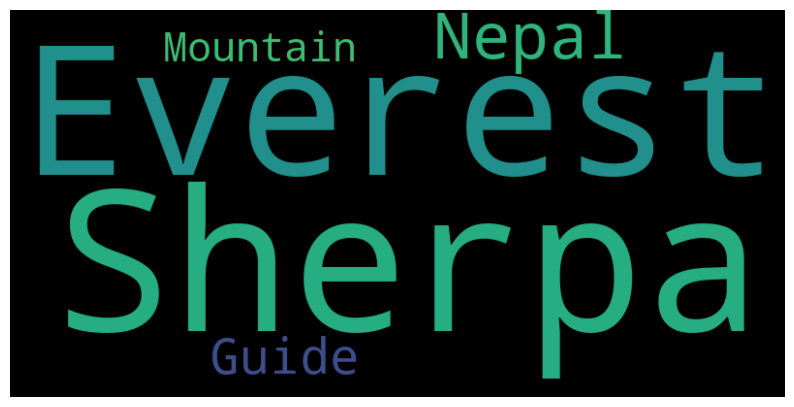

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


common_words = {
'Sherpa': 54,
'Everest': 45,
'Nepal': 42,
'Guide': 23,
'Mountain': 15
}


wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(common_words)


plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()